In [1]:
import pandas as pd

# Define column names (not included in raw CSV)
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url, header=None, names=columns)

# Show first 5 rows
print("🔍 First 5 Rows:")
print(df.head())

# Basic info
print("\n📊 Dataset Info:")
print(df.info())

# Null value check
print("\n🧼 Null/Missing Values:")
print(df.isnull().sum())

# Basic statistics
print("\n📈 Summary Stats:")
print(df.describe())


🔍 First 5 Rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 

In [2]:
# Columns where 0 is medically invalid (to be treated as missing)
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count of zero entries in these columns
for col in invalid_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")

Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [4]:
# Columns where 0 is medically invalid (to be treated as missing)
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in invalid_cols:
    df[col] = df[col].replace(0, df[col].median())
    print(f"{col}: {zero_count} zeros")

Glucose: 11 zeros
BloodPressure: 11 zeros
SkinThickness: 11 zeros
Insulin: 11 zeros
BMI: 11 zeros


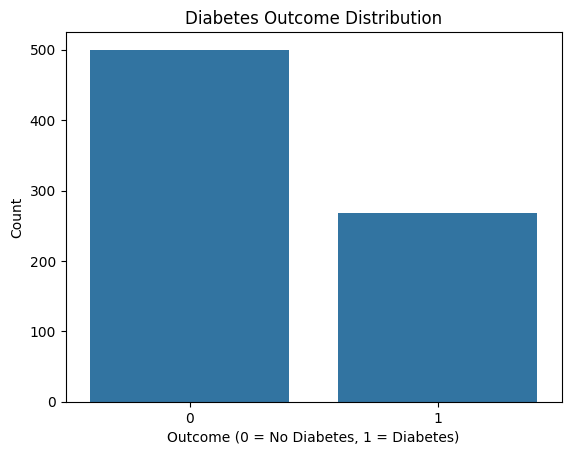

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target distribution
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()


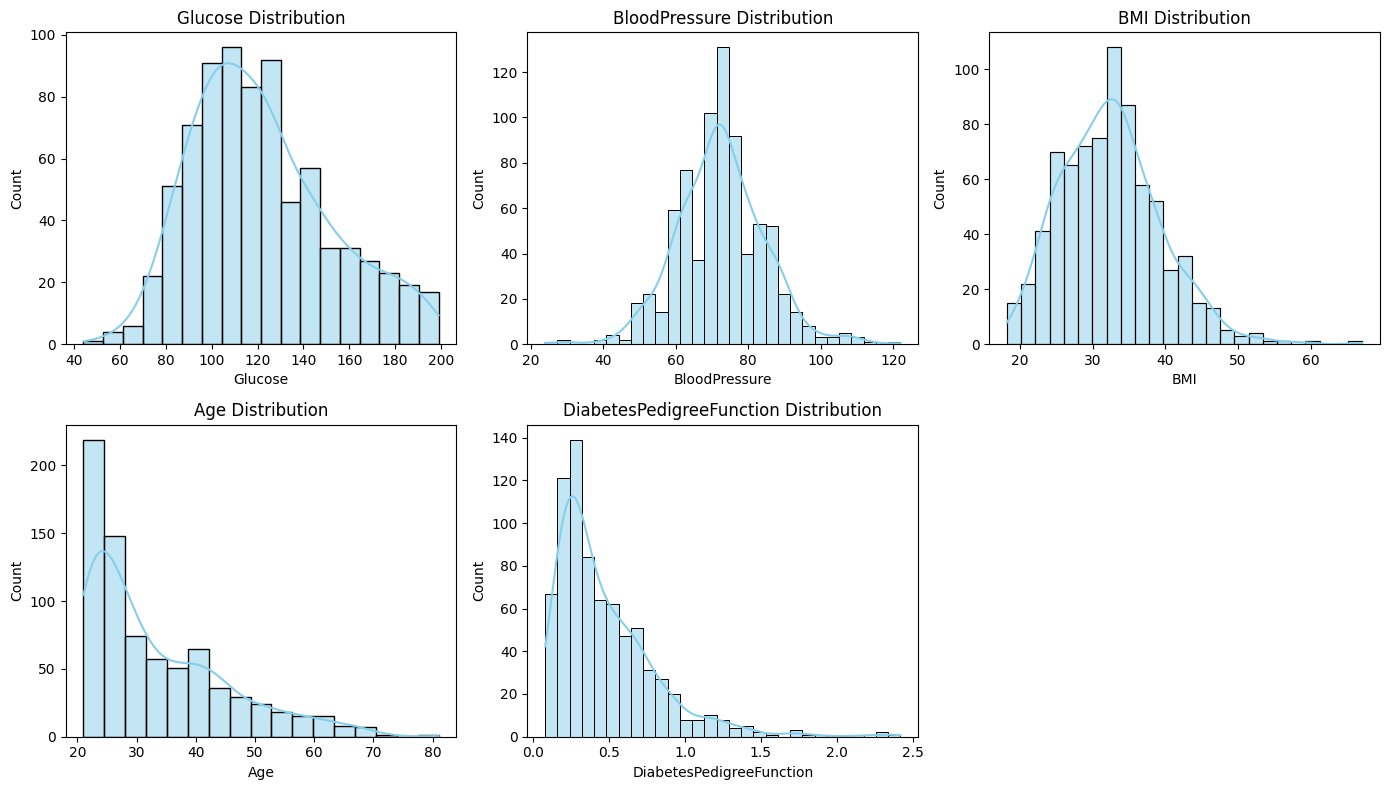

In [6]:
# Set of important features to visualize
features = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'DiabetesPedigreeFunction']

# Plot histograms
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy Score: 0.7532467532467533

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


🔍 Confusion Matrix:
 [[79 20]
 [18 37]]


<Figure size 640x480 with 0 Axes>

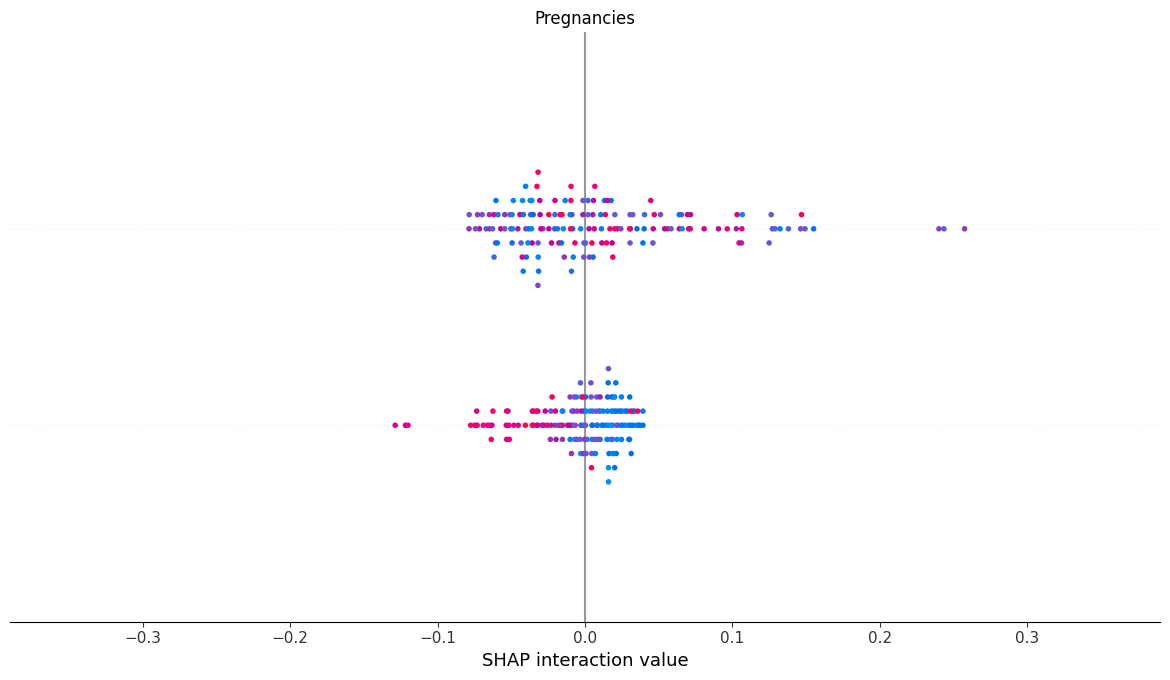

In [11]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Define column names (not included in raw CSV)
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]


# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url, header=None, names=columns)

model = RandomForestClassifier(random_state=42)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions
y_pred = model.predict(X_test)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)


In [12]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7207792207792207

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [15]:
from imblearn.over_sampling import SMOTE

# Apply only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())



Before SMOTE: Outcome
0    401
1    213
Name: count, dtype: int64
After SMOTE: Outcome
0    401
1    401
Name: count, dtype: int64


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

print("✅ Accuracy Score:", accuracy_score(y_test, y_pred_tuned))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_tuned))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
✅ Accuracy Score: 0.7467532467532467

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [45]:

from fpdf import FPDF

def generate_pdf_report(patient_data, prediction, probability, shap_impact, output_path="sushruta_report.pdf"):
    pdf = FPDF()
    pdf.add_page()
    
    
    pdf.set_font("Arial", 'B', 16)
    pdf.cell(0, 10, "SushrutaDx Diabetes Risk Report", ln=True, align='C')
    
    pdf.set_font("Arial", '', 12)
    pdf.ln(10)
    pdf.cell(0, 10, f"Prediction: {'Diabetic' if prediction == 1 else 'Non-Diabetic'}", ln=True)
    pdf.cell(0, 10, f"Confidence: {round(probability * 100, 2)}%", ln=True)
    pdf.ln(5)

    pdf.set_font("Arial", 'B', 12)
    pdf.cell(0, 10, "Patient Input Features:", ln=True)
    pdf.set_font("Arial", '', 12)
    for key, val in patient_data.items():
        pdf.cell(0, 10, f"{key}: {val}", ln=True)
    
    pdf.ln(5)
    pdf.set_font("Arial", 'B', 12)
    pdf.cell(0, 10, "Top Influencing Factors (via SHAP):", ln=True)
    pdf.set_font("Arial", '', 12)
    for feature, impact in shap_impact[:5]:  # Top 5
        pdf.cell(0, 10, f"{feature}: {round(impact, 4)}", ln=True)

    pdf.ln(10)
    pdf.set_font("Arial", 'I', 11)
    pdf.multi_cell(0, 10, "Disclaimer: This is a predictive risk estimation tool. It does not constitute a medical diagnosis. Please consult a physician for further testing.")

    pdf.output(output_path)
    print(f"PDF generated: {output_path}")



In [46]:
# Choose a patient
sample_index = 0
patient = X_test.iloc[sample_index]
prediction = best_model.predict(patient.values.reshape(1, -1))[0]
probability = best_model.predict_proba(patient.values.reshape(1, -1))[0][1]
# Print prediction and probability
print(f"Patient {sample_index} Prediction: {'Diabetic' if prediction == 1 else 'Non-Diabetic'}")
print(f"Probability: {round(probability * 100, 2)}%")
# Print patient data
print("\nPatient Data:")
print(patient)

# Get SHAP values (for class 1 if model is multiclass/binary)
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# For binary classification, shap_values is a list → pick class 1
# Use shap_values[1][i] for SHAP values of the 1st class (diabetic)
shap_contrib = shap_values[1][sample_index] if isinstance(shap_values, list) else shap_values[sample_index, :]

# Flatten shap_contrib to ensure it's a 1D array
shap_contrib_flat = shap_contrib.flatten()

# Pair feature names with their shap impact
patient_shap = list(zip(X_test.columns, shap_contrib_flat.tolist()))  # Converts to float

# Now generate PDF with sorted SHAP impact
generate_pdf_report(
    patient.to_dict(),
    prediction,
    probability,
    sorted(patient_shap, key=lambda x: abs(x[1]), reverse=True)
)



Patient 0 Prediction: Non-Diabetic
Probability: 48.0%

Patient Data:
Pregnancies                   6.00
Glucose                      98.00
BloodPressure                58.00
SkinThickness                33.00
Insulin                     190.00
BMI                          34.00
DiabetesPedigreeFunction      0.43
Age                          43.00
Name: 668, dtype: float64
PDF generated: sushruta_report.pdf


/Users/rajkumarmyakala/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/rajkumarmyakala/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
import pickle

# Save the best model again cleanly
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ model.pkl saved successfully!")
# Load the model
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
# Test the loaded model
sample_patient = X_test.iloc[0]
sample_prediction = loaded_model.predict(sample_patient.values.reshape(1, -1))[0]
sample_probability = loaded_model.predict_proba(sample_patient.values.reshape(1, -1))[0][1]
print(f"Loaded Model Prediction: {'Diabetic' if sample_prediction == 1 else 'Non-Diabetic'}")
print(f"Probability: {round(sample_probability * 100, 2)}%")
import json
# Save the model as JSON
model_json = loaded_model.get_params()
with open("model.json", "w") as json_file:
    json.dump(model_json, json_file)
print("✅ model.json saved successfully!")

✅ model.pkl saved successfully!
Loaded Model Prediction: Non-Diabetic
Probability: 48.0%
✅ model.json saved successfully!


/Users/rajkumarmyakala/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/rajkumarmyakala/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
